In [135]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#importing from scikit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [95]:
customer_info = pd.read_excel('/content/drive/MyDrive/Bank_Churn_Messy.xlsx',sheet_name='Customer_Info')

In [96]:
account_info=pd.read_excel('/content/drive/MyDrive/Bank_Churn_Messy.xlsx',sheet_name='Account_Info')

In [ ]:
customer_info


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [ ]:
account_info

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0


In [ ]:
customer_info.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
EstimatedSalary,object


In [ ]:
account_info.dtypes

,0
CustomerId,int64
Balance,object
NumOfProducts,int64
HasCrCard,object
Tenure,int64
IsActiveMember,object
Exited,int64


In [97]:
# Drop the duplicates
customer_info.duplicated().sum()

np.int64(1)

In [98]:
customer_info.drop_duplicates(keep='first',inplace=True)
customer_info.duplicated().sum()

np.int64(0)

In [99]:
account_info.duplicated().sum()

np.int64(2)

In [100]:
account_info.drop_duplicates(keep='first',inplace=True)
account_info.duplicated().sum()

np.int64(0)

In [101]:
# Merge the data
merged_data=pd.merge(left=customer_info,right=account_info,how='inner',on=['CustomerId','Tenure'])
merged_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


In [102]:
#removing null values
merged_data.isnull().sum()

,0
CustomerId,0
Surname,3
CreditScore,0
Geography,0
Gender,0
Age,3
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0


In [103]:
#dropping personally identifiable information
#merged_data=merged_data.iloc[:,2:]

merged_data.drop(['CustomerId','Surname'],axis=1,inplace=True)
merged_data

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9996,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9997,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9998,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


In [104]:
#Null handling
merged_data['Age']=merged_data['Age'].fillna(merged_data['Age'].median())

In [105]:
merged_data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [106]:
# Updating EstimatedSalary and Balance Value

merged_data['EstimatedSalary'] = merged_data['EstimatedSalary'].str.replace('€','')
merged_data['Balance'] = merged_data['Balance'].str.replace('€','')

merged_data['EstimatedSalary']=merged_data['EstimatedSalary'].astype('float64')
merged_data['Balance']=merged_data['Balance'].astype('float64')

merged_data.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
3,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
4,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


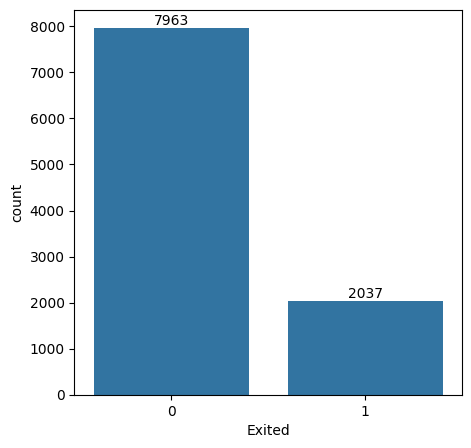

In [107]:
#Analysing target variable
plt.figure(figsize=(5,5))
ax=sns.countplot(getdummies_df,x='Exited')
plt.bar_label(ax.containers[0])
plt.show()

In [108]:
merged_data.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
3,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
4,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


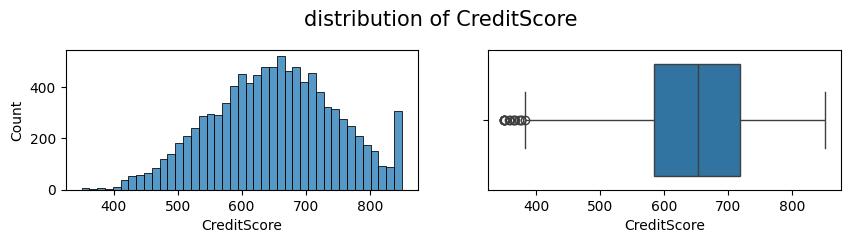

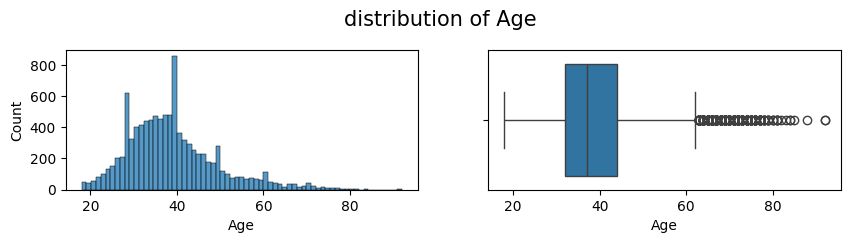

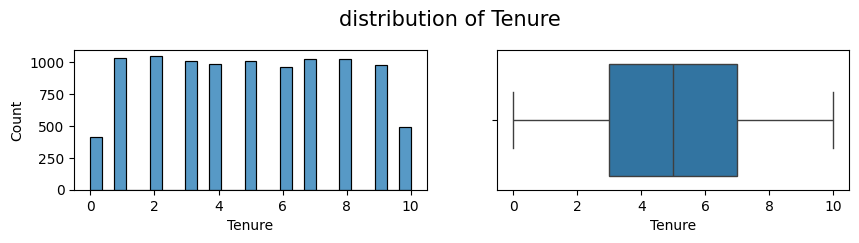

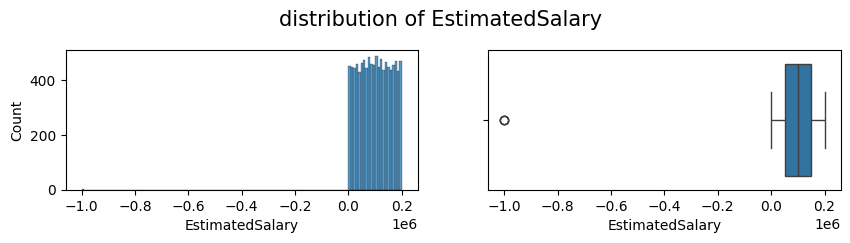

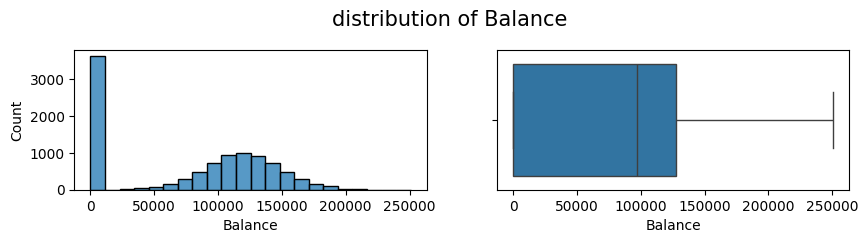

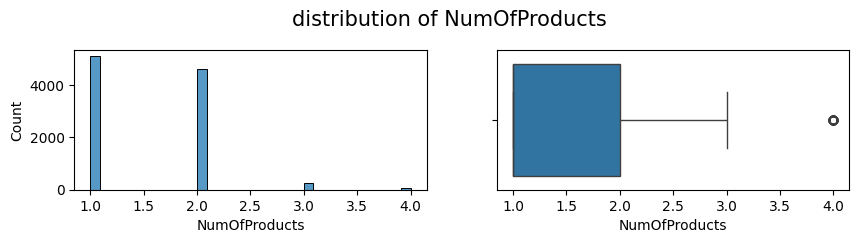

In [109]:
#univariate analysis#numerical analysis
for cols in merged_data.columns:
  if merged_data[cols].dtype !='O' and cols != 'Exited':
    plt.figure(figsize=(10,4))
    plt.suptitle(f"distribution of {cols}",fontsize=15)
    plt.subplot(2,2,1)
    sns.histplot(data=merged_data,x=merged_data[cols])
    plt.subplot(2,2,2)
    sns.boxplot(merged_data[cols],orient= 'h')
    plt.show()

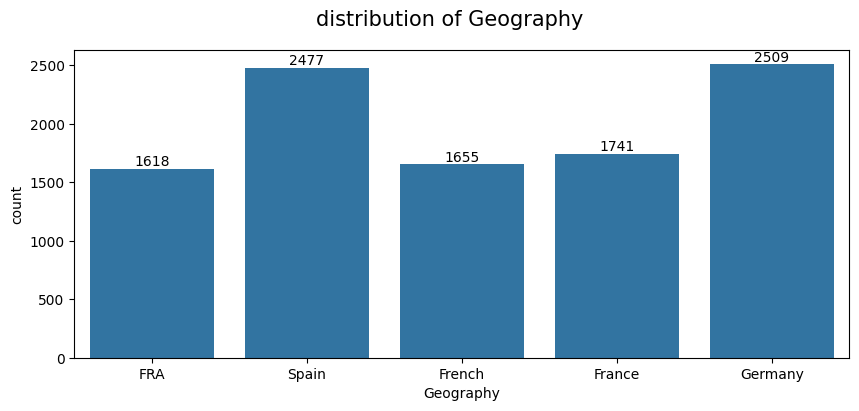

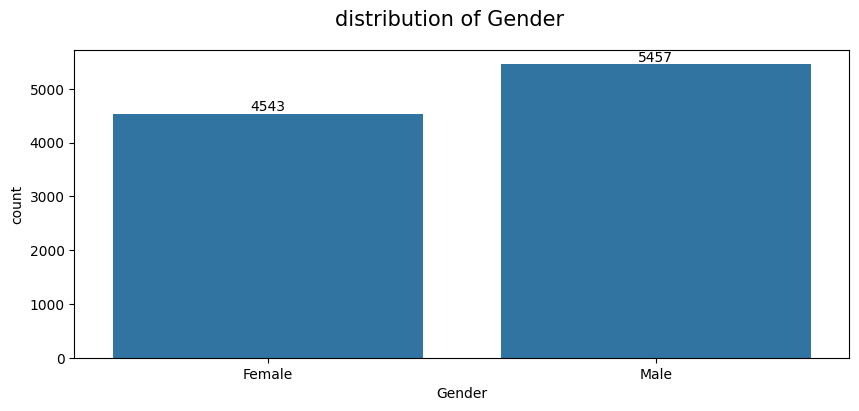

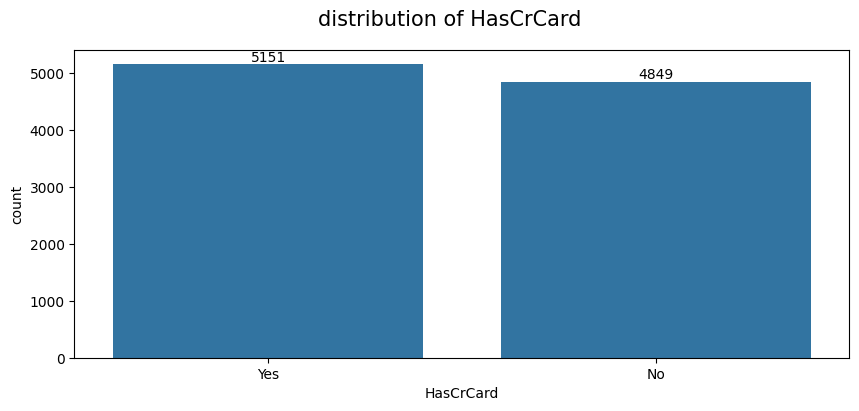

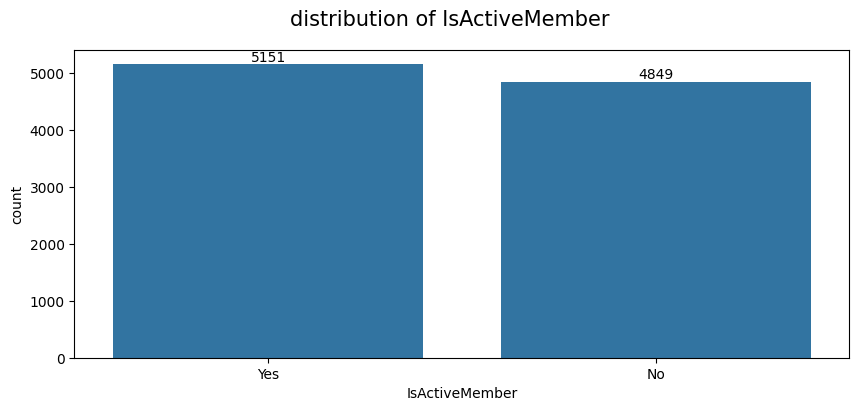

In [110]:
#univariate analysis#categorical analysis
for cols in merged_data.columns:
  if merged_data[cols].dtype =='O':
    plt.figure(figsize=(10,4))
    plt.suptitle(f"distribution of {cols}",fontsize=15)
    ax=sns.countplot(data=merged_data,x=merged_data[cols])
    plt.bar_label(ax.containers[0])

    plt.show()

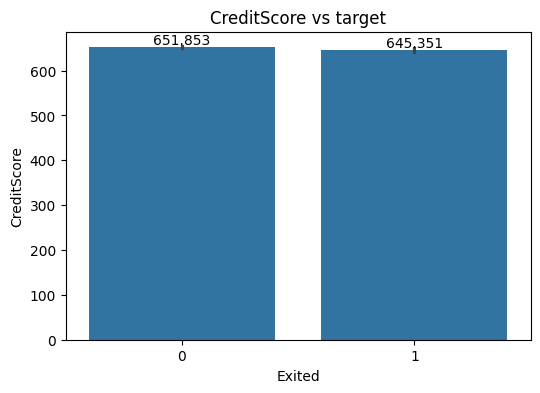

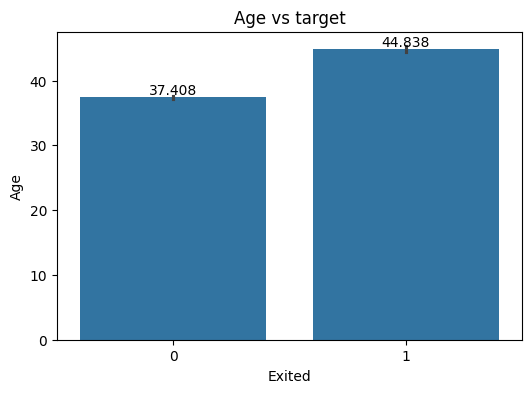

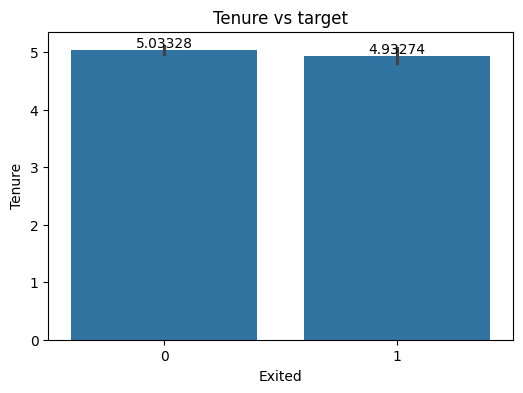

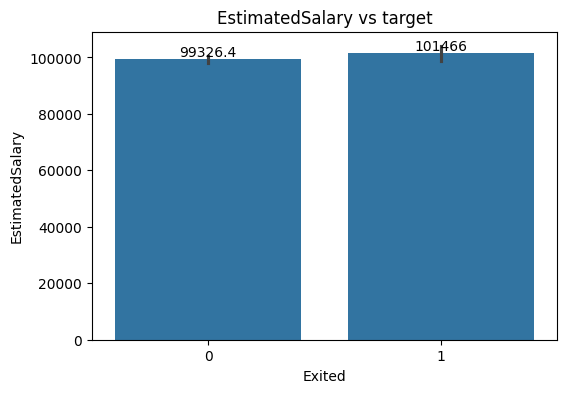

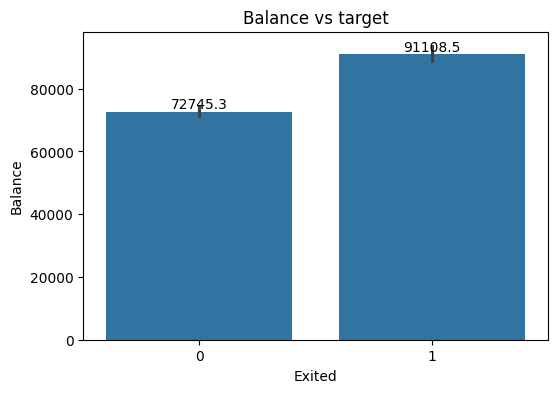

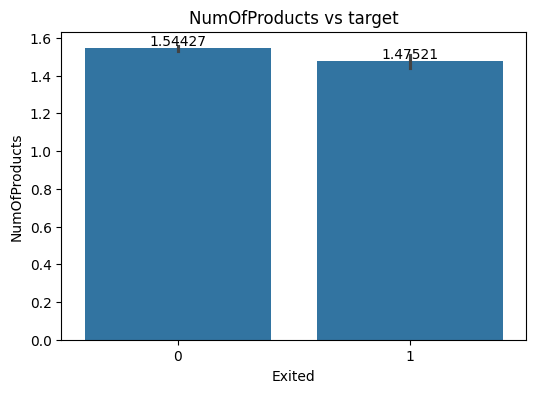

In [112]:
#bivariate analysis#comparison of target variable and numerical variables

for cols in merged_data.columns:
  if merged_data[cols].dtype!='O' and cols!= 'Exited':
    plt.figure(figsize=(6,4))
    plt.title(f"{cols} vs target")
    ax=sns.barplot(data=merged_data,y=cols,x='Exited')
    plt.bar_label(ax.containers[0])
    plt.show()


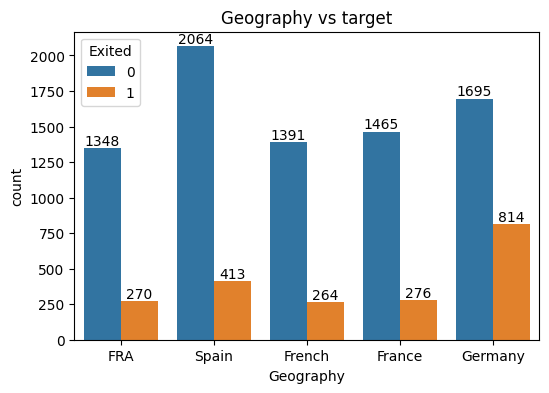

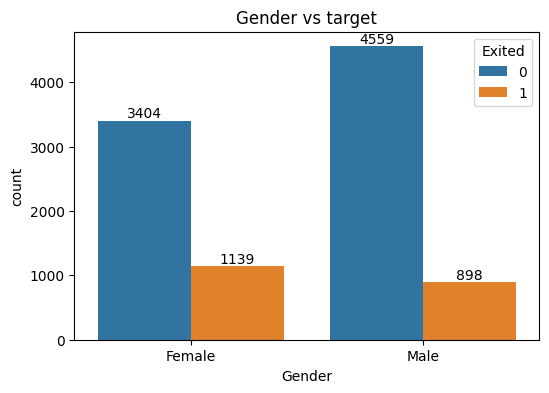

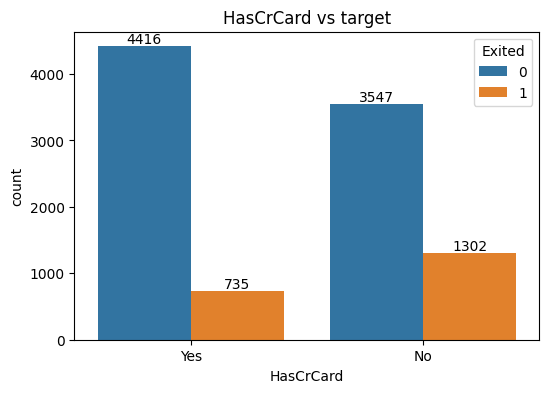

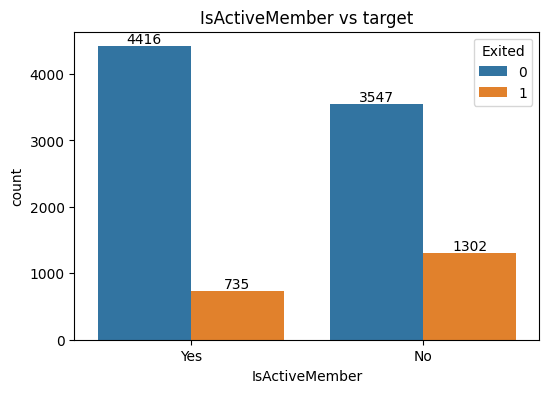

In [115]:
#bivariate analysis#comparison of target variable and categorical variables
for cols in merged_data.columns:
  if merged_data[cols].dtype=='O' and cols!= 'Exited':
    plt.figure(figsize=(6,4))
    plt.title(f"{cols} vs target")
    ax=sns.countplot(data=merged_data,x=cols,hue='Exited')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])

    plt.show()

In [117]:
# Encoding
for cols in merged_data.select_dtypes(include='object').columns:
  print(f'{cols}:{merged_data[cols].nunique()}')

Geography:5
Gender:2
HasCrCard:2
IsActiveMember:2


In [118]:
 merged_data.select_dtypes(include='object')

,Geography,Gender,HasCrCard,IsActiveMember
0,FRA,Female,Yes,Yes
1,Spain,Female,Yes,Yes
2,French,Female,No,No
3,FRA,Female,No,No
4,Spain,Female,Yes,Yes
...,...,...,...,...
9995,France,Male,No,No
9996,French,Male,Yes,Yes
9997,FRA,Female,Yes,Yes
9998,Germany,Male,No,No


In [119]:
merged_data['Gender']=merged_data['Gender'].map({'Male':1,'Female':0})


In [120]:
merged_data['Gender'].unique()

array([0, 1])

In [121]:
merged_data['HasCrCard']=merged_data['HasCrCard'].map({'Yes':1,'No':0})
merged_data['HasCrCard'].unique()

array([1, 0])

In [122]:
merged_data['IsActiveMember']=merged_data['IsActiveMember'].map({'Yes':1,'No':0})
merged_data['HasCrCard'].unique()

array([1, 0])

In [123]:
set(merged_data['EstimatedSalary'])

{32770.56,
 98309.27,
 131083.56,
 196622.28,
 98320.27,
 131093.99,
 32790.02,
 131097.9,
 65565.92,
 65567.91,
 196645.87,
 196651.72,
 98348.66,
 98349.13,
 32824.15,
 32825.5,
 196668.51,
 98368.24,
 196673.28,
 163911.32,
 65611.01,
 65612.12,
 32845.32,
 65618.01,
 90.07,
 91.75,
 131167.98,
 96.27,
 65632.33,
 32863.24,
 65636.92,
 131173.9,
 163944.18,
 131177.22,
 106.67,
 98413.1,
 65657.29,
 123.07,
 196731.08,
 32900.41,
 32903.93,
 131211.86,
 65675.47,
 32909.13,
 142.81,
 143.34,
 65682.93,
 32916.29,
 98453.45,
 163989.66,
 32919.42,
 98463.99,
 196767.83,
 131238.37,
 32936.44,
 65706.86,
 65708.5,
 164017.89,
 131249.46,
 178.19,
 164018.98,
 196789.9,
 65720.92,
 196794.11,
 131259.6,
 65731.53,
 164038.07,
 164039.51,
 164040.94,
 131281.28,
 131283.6,
 131284.93,
 216.27,
 164061.6,
 65758.19,
 164064.44,
 131300.68,
 131301.74,
 65765.22,
 32999.1,
 131304.45,
 65769.3,
 131305.37,
 164074.89,
 236.45,
 32996.89,
 131312.56,
 164081.42,
 164083.72,
 196853.11,
 24

In [124]:
merged_data['EstimatedSalary']=merged_data['EstimatedSalary'].astype('float')

In [125]:
merged_data['Balance']=merged_data['Balance'].astype('float')

In [126]:
merged_data.dtypes

,0
CreditScore,int64
Geography,object
Gender,int64
Age,float64
Tenure,int64
EstimatedSalary,float64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64


In [127]:
#One Hot encoder
getdummies_df = pd.get_dummies(merged_data, dtype='int', drop_first=True)


In [128]:
getdummies_df

,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,619,0,42.0,2,101348.88,0.00,1,1,1,1,0,0,0,0
1,608,0,41.0,1,112542.58,83807.86,1,1,1,0,0,0,0,1
2,502,0,42.0,8,113931.57,159660.80,3,0,0,1,0,1,0,0
3,699,0,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0
4,850,0,43.0,2,79084.10,125510.82,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39.0,5,96270.64,0.00,2,0,0,0,1,0,0,0
9996,516,1,35.0,10,101699.77,57369.61,1,1,1,0,0,1,0,0
9997,709,0,36.0,7,42085.58,0.00,1,1,1,1,0,0,0,0
9998,772,1,42.0,3,92888.52,75075.31,2,0,0,1,0,0,1,0


In [129]:
merged_data['Geography'].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [130]:
merged_data['Geography'].value_counts(normalize=True)

,proportion
Geography,
Germany,0.2509
Spain,0.2477
France,0.1741
French,0.1655
FRA,0.1618


In [131]:
getdummies_df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'EstimatedSalary', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Geography_France', 'Geography_French', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [132]:
getdummies_df.dtypes

,0
CreditScore,int64
Gender,int64
Age,float64
Tenure,int64
EstimatedSalary,float64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
Exited,int64


In [133]:
round(getdummies_df['Exited'].value_counts(normalize=True)*100,2)

,proportion
Exited,
0,79.63
1,20.37


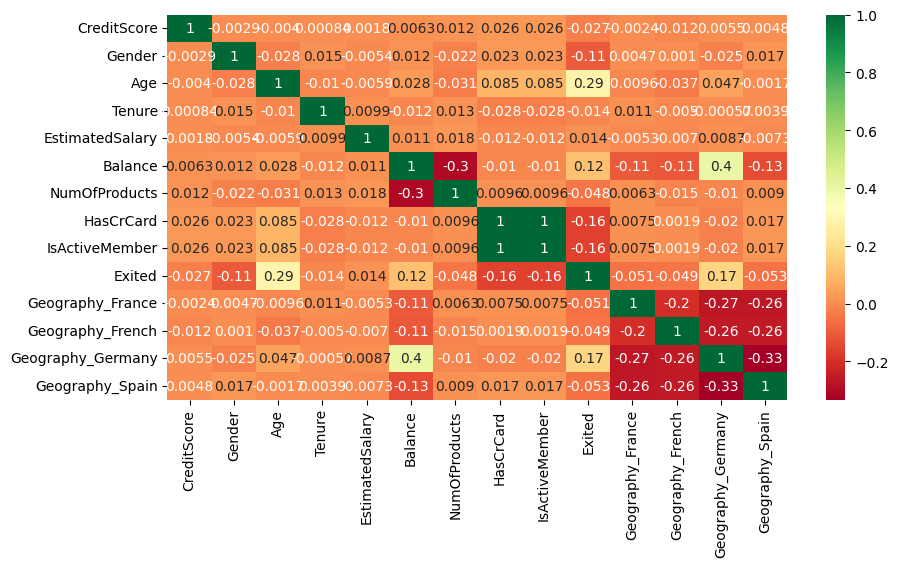

In [134]:
#Multi collinearity analysis
plt.figure(figsize=(10,5))
sns.heatmap(getdummies_df.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [137]:
# Train test split
x=getdummies_df.drop(columns=['Exited'])
y=getdummies_df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [138]:
# Balancing the data - Target variable's proportion

smote=SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

x_train_smote.shape,y_train_smote.shape

((12740, 13), (12740,))

In [139]:
x_train_smote.head()


,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,753,1,57.0,7,159475.08,0.00,1,0,0,0,1,0,0
1,739,1,32.0,3,63981.37,102128.27,1,0,0,0,0,1,0
2,755,0,37.0,0,117396.25,113865.23,2,1,1,0,0,1,0
3,561,1,37.0,5,83093.25,0.00,2,0,0,0,1,0,0
4,692,1,49.0,6,107472.99,110540.43,2,1,1,0,0,1,0


In [140]:
y_train_smote.head()


,Exited
0,1
1,1
2,0
3,0
4,0


In [143]:
# scaling the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_smote)
x_test_scaled=scaler.transform(x_test)

x_train_scaled=pd.DataFrame(x_train_scaled,columns=scaler.get_feature_names_out())
x_test_scaled=pd.DataFrame(x_test_scaled,columns=scaler.get_feature_names_out())


In [144]:
x_train_scaled.head()

,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,1.135396,1.173777,1.572629,0.787428,0.980979,-1.348935,-0.728277,-0.765221,-0.765221,-0.363237,2.813419,-0.580009,-0.463506
1,0.982531,1.173777,-0.905301,-0.680932,-0.611016,0.327477,-0.728277,-0.765221,-0.765221,-0.363237,-0.355439,1.724111,-0.463506
2,1.157234,-0.851950,-0.409715,-1.782201,0.279475,0.520137,1.037663,1.306812,1.306812,-0.363237,-0.355439,1.724111,-0.463506
3,-0.961044,1.173777,-0.409715,0.053248,-0.292398,-1.348935,1.037663,-0.765221,-0.765221,-0.363237,2.813419,-0.580009,-0.463506
4,0.469340,1.173777,0.779691,0.420338,0.114042,0.465561,1.037663,1.306812,1.306812,-0.363237,-0.355439,1.724111,-0.463506


Training score of decision tree:100.0
tseting score of decision tree:51.65
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.78      0.55      0.65      1593
           1       0.18      0.37      0.24       407

    accuracy                           0.52      2000
   macro avg       0.48      0.46      0.44      2000
weighted avg       0.65      0.52      0.56      2000



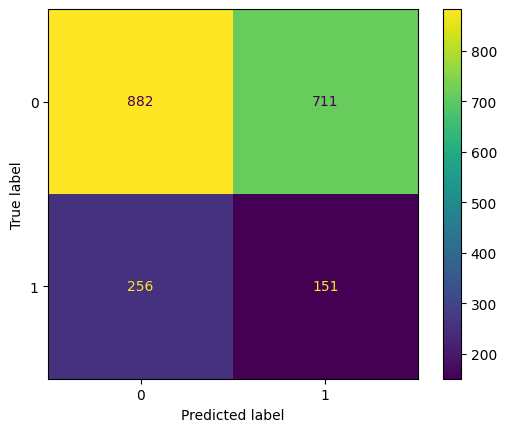

In [146]:
# Decision tree
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train_smote,y_train_smote)
print(f"Training score of decision tree:{round(dtree.score(x_train_smote,y_train_smote)*100,2)}")
y_pred_dtree=dtree.predict(x_test_scaled)
print(f"tseting score of decision tree:{round(accuracy_score(y_test,y_pred_dtree)*100,2)}")
print("********** Classification Report **********")
print(classification_report(y_test,y_pred_dtree))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtree)

Training Score of Random Forest : 100.0
Testing Score of Random Forest : 81.2
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.92      0.08      0.15       407

    accuracy                           0.81      2000
   macro avg       0.86      0.54      0.52      2000
weighted avg       0.83      0.81      0.74      2000



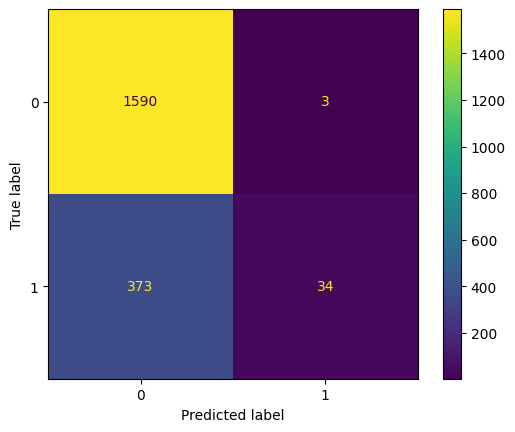

In [147]:
#- Random Forest

rf= RandomForestClassifier(random_state=42)
rf.fit(x_train_smote,y_train_smote)
print(f"Training Score of Random Forest : {round(rf.score(x_train_smote,y_train_smote)*100,2)}")
y_pred_rf = rf.predict(x_test_scaled)
print(f"Testing Score of Random Forest : {round(accuracy_score(y_test,y_pred_rf)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_rf))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)

Training Score of knn : 57.35
Testing Score of knn : 78.65
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.48      0.62      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.79      0.80      2000



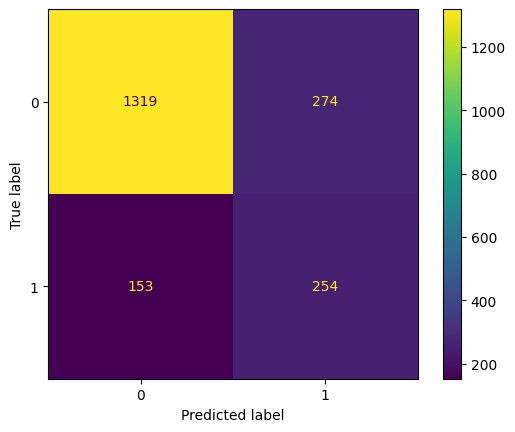

In [149]:
# Training the model-KNN
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train_scaled,y_train_smote)
print(f"Training Score of knn : {round(knn.score(x_train_smote,y_train_smote)*100,2)}")
y_pred_knn=knn.predict(x_test_scaled)
print(f"Testing Score of knn : {round(accuracy_score(y_test,y_pred_knn)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_knn))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)



Training Score of Logistic Regression : 80.56
Testing Score of Logistic Regression : 74.3
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1593
           1       0.40      0.53      0.46       407

    accuracy                           0.74      2000
   macro avg       0.64      0.66      0.64      2000
weighted avg       0.77      0.74      0.76      2000



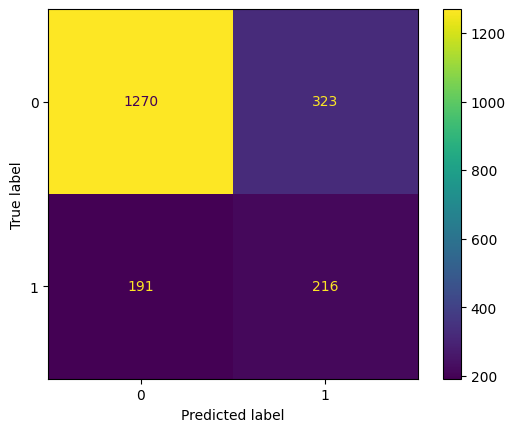

In [150]:
# Training the model - Logistic Regression

log_reg= LogisticRegression(n_jobs=-1)
log_reg.fit(x_train_scaled,y_train_smote)
print(f"Training Score of Logistic Regression : {round(log_reg.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_log_reg = log_reg.predict(x_test_scaled)
print(f"Testing Score of Logistic Regression : {round(accuracy_score(y_test,y_pred_log_reg)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_log_reg))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_reg)

In [153]:
# Since KNN has better Performance compared to all other Algorithms, Tuning for the best parameters

knn=KNeighborsClassifier(n_jobs=-1)
param={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
tuning=GridSearchCV(estimator=knn, param_grid=param,cv=5, verbose=2)
tuning.fit(x_train_scaled,y_train_smote)
best_params=tuning.best_params_
print(f"Best Parameters : {tuning.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................algorithm=auto, weights=uniform; total time=   1.2s
[CV] END ....................algorithm=auto, weights=uniform; total time=   1.1s
[CV] END ....................algorithm=auto, weights=uniform; total time=   1.0s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.7s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.6s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.2s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.2s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.2s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.3s
[CV] END ...............algorithm=ball_tree, weights=uniform; total time=   0.7s
[CV] END ...............algorithm=ball_tree, weig

In [154]:
knn.set_params(**best_params)
cv_score=[]
for k in range(1,20):
    knn_cv = knn.set_params(n_neighbors=k)
    scores = cross_val_score(knn_cv, x_train_scaled, y_train_smote, scoring='accuracy', n_jobs=-1)
    cv_score.append(scores.mean())

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'distance'}

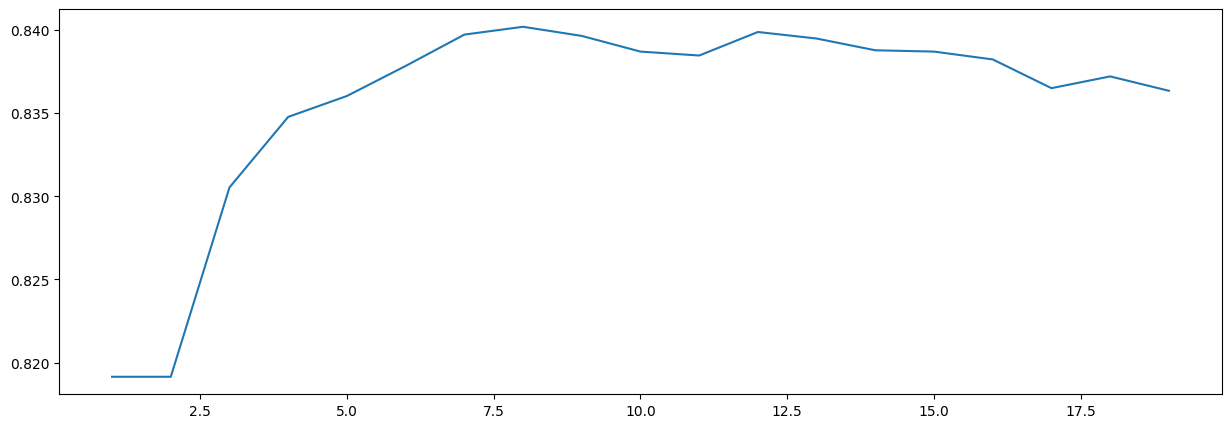

In [155]:
# Plotting the Graph to find optimum k values

plt.figure(figsize=(15,5))
plt.plot(range(1,20), cv_score)
plt.show()

Training Score of KNN : 100.0
Testing Score of KNN : 78.75
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1593
           1       0.48      0.62      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



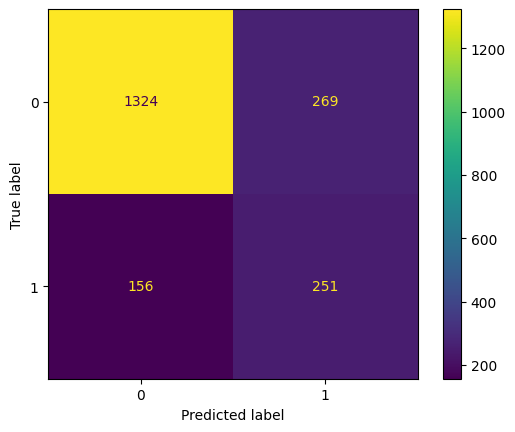

In [156]:
# Optimum K Value as 6 and Training the KNN

knn.set_params(n_neighbors=6)
knn.fit(x_train_scaled,y_train_smote)
print(f"Training Score of KNN : {round(knn.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_knn = knn.predict(x_test_scaled)
print(f"Testing Score of KNN : {round(accuracy_score(y_test,y_pred_knn)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_knn))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

In [157]:
# Feature Importance

feature_importance = rf.feature_importances_
feature_importance
feature_df = pd.DataFrame({'Feature':x_train_scaled.columns,'Importance':feature_importance})
feature_df.sort_values(by='Importance',ascending=False,inplace=True)
feature_df['Percentag_Importace']= round(feature_df['Importance']*100,2)
feature_df['Cumulative_Percentage'] = feature_df['Percentag_Importace'].cumsum()
feature_df

,Feature,Importance,Percentag_Importace,Cumulative_Percentage
2,Age,0.251899,25.19,25.19
4,EstimatedSalary,0.107143,10.71,35.90
5,Balance,0.106146,10.61,46.51
0,CreditScore,0.098652,9.87,56.38
6,NumOfProducts,0.097082,9.71,66.09
7,HasCrCard,0.068360,6.84,72.93
3,Tenure,0.062278,6.23,79.16
8,IsActiveMember,0.054392,5.44,84.60
1,Gender,0.049775,4.98,89.58
9,Geography_France,0.032448,3.24,92.82
